In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math

In [2]:
def df_origen(origen,destino):     
    
    ######################PICKLE 21###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)

    df = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)    
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)
            
    df_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)

    
    #Cambiamos la frecuencia a dias
    df.index.freq = df.index.inferred_freq
    df_Dia = df.resample('24H').sum()
    
    df2.index.freq = df2.index.inferred_freq
    df2_Dia = df2.resample('24H').sum()
    
    df3.index.freq = df3.index.inferred_freq
    df3_Dia = df3.resample('24H').sum()

    #Sacamos una lista de los trayectos origen en comun con mayor número de viajes
    mean_df = df_Dia.mean()
    mean_dict = mean_df.to_dict()
    main_lines = list(dict.keys(dict(filter(lambda x: x[1] > 15000, mean_dict.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    mean_df2 = df2_Dia.mean()
    mean_dict2 = mean_df2.to_dict()
    main_lines2 = list(dict.keys(dict(filter(lambda x: x[1] > 2000, mean_dict2.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    mean_df3 = df3_Dia.mean()
    mean_dict3 = mean_df3.to_dict()
    main_lines3 = list(dict.keys(dict(filter(lambda x: x[1] > 2000, mean_dict3.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    #Sacamos solo los trayectos principales 
    main_lines.insert(0,"ds")    
    df_main_lines = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Referencia2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines)
    
    main_lines2.insert(0,"ds")    
    df_main_lines2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines2)
    
    main_lines3.insert(0,"ds")    
    df_main_lines3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines3)
    
    #Añadimos nuevas columnas
    df_main_lines['Fecha'] = df_main_lines.index.date
    df_main_lines['Año'] = df_main_lines.index.year                                
    df_main_lines['Mes'] = df_main_lines.index.month                               
    df_main_lines['ID_Dia'] = df_main_lines.index.dayofweek
    df_main_lines['Hora'] = df_main_lines.index.hour
    
    df_main_lines2['Fecha'] = df_main_lines2.index.date
    df_main_lines2['Año'] = df_main_lines2.index.year                                
    df_main_lines2['Mes'] = df_main_lines2.index.month                               
    df_main_lines2['ID_Dia'] = df_main_lines2.index.dayofweek
    df_main_lines2['Hora'] = df_main_lines2.index.hour
    
    df_main_lines3['Fecha'] = df_main_lines3.index.date
    df_main_lines3['Año'] = df_main_lines3.index.year                                
    df_main_lines3['Mes'] = df_main_lines3.index.month                               
    df_main_lines3['ID_Dia'] = df_main_lines3.index.dayofweek
    df_main_lines3['Hora'] = df_main_lines3.index.hour
    
    df_Final['Fecha'] = df_Final.index.date
    df_Final['Año'] = df_Final.index.year                                
    df_Final['Mes'] = df_Final.index.month                               
    df_Final['ID_Dia'] = df_Final.index.dayofweek
    df_Final['Hora'] = df_Final.index.hour
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    
    return df, lista, df_Dia, main_lines, df_main_lines, df2, df2_Dia, main_lines2, df_main_lines2, df3, df3_Dia, main_lines3, df_main_lines3 ,df_Final,df2_Final, df3_Final,listaDst

In [3]:
origen = "2807913"
destino = "2807901"
df, lista, df_Dia, main_lines, df_main_lines, df2, df2_Dia, main_lines2, df_main_lines2, df3, df3_Dia, main_lines3, df_main_lines3 ,df_Final,df2_Final, df3_Final,listaDst = df_origen(origen,destino)
df_main_lines.head(5)
df_main_lines2.head(5)
df_Final.head(5)
#df2_Final.head(5)

,2807913-2807901,Fecha,Año,Mes,ID_Dia,Hora
ds,,,,,,
2020-02-14 00:00:00,210.671,2020-02-14,2020,2,4,0
2020-02-14 01:00:00,185.528,2020-02-14,2020,2,4,1
2020-02-14 02:00:00,235.173,2020-02-14,2020,2,4,2
2020-02-14 03:00:00,230.199,2020-02-14,2020,2,4,3
2020-02-14 04:00:00,403.653,2020-02-14,2020,2,4,4


In [4]:
#print(names_1)
#print(lista)
#df2_Final.dtypes

In [5]:
#Creamos intervalos de datos por periodos
data1=df_Final.loc['2020-02-14':'2020-03-15']
data2=df2_Final.loc['2020-07-01':'2020-07-31']
data3=df3_Final.loc['2020-08-01':'2020-08-31']
data4=df3_Final.loc['2020-09-01':'2020-09-30']
#data4.tail(5)


In [6]:
print(listaDst)

['ds', '2807913-2807901']


In [7]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4]       
        
for periodo in lista_periodos:        
    #print(ciclo)
    #print(cont)
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=[listaDst[1],'Hora','Fecha'])
    globals()[f"df_{periodo}"].set_index(listaDst[1], inplace = True)    


In [8]:
#print(main_lines2)
#df_3.head(5)

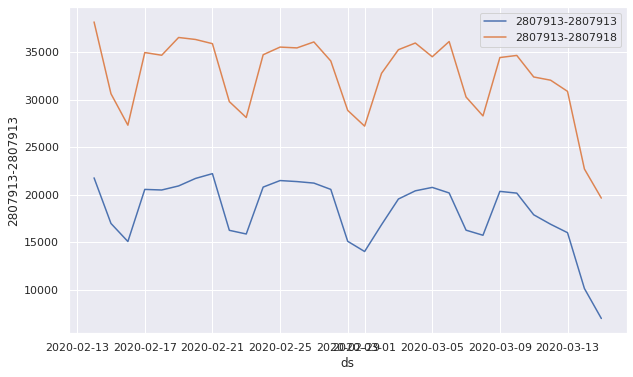

In [9]:
sb.set(rc = {'figure.figsize':(10,6)})
#for trayecto in lista:
for trayecto in main_lines:
    x=trayecto.startswith(origen)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_Dia.loc['2020-02-14':'2020-03-15'],legend='brief',label=trayecto)        

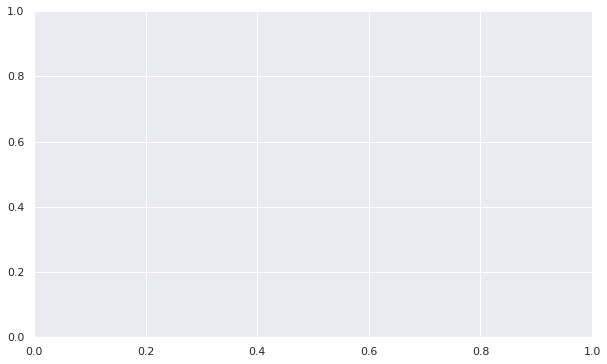

In [10]:
#for trayecto in lista:
for trayecto in main_lines2:
    x=trayecto.startswith(origen)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df2_Dia.loc['2020-03-16':'2020-04-15'],legend='brief',label=trayecto)        

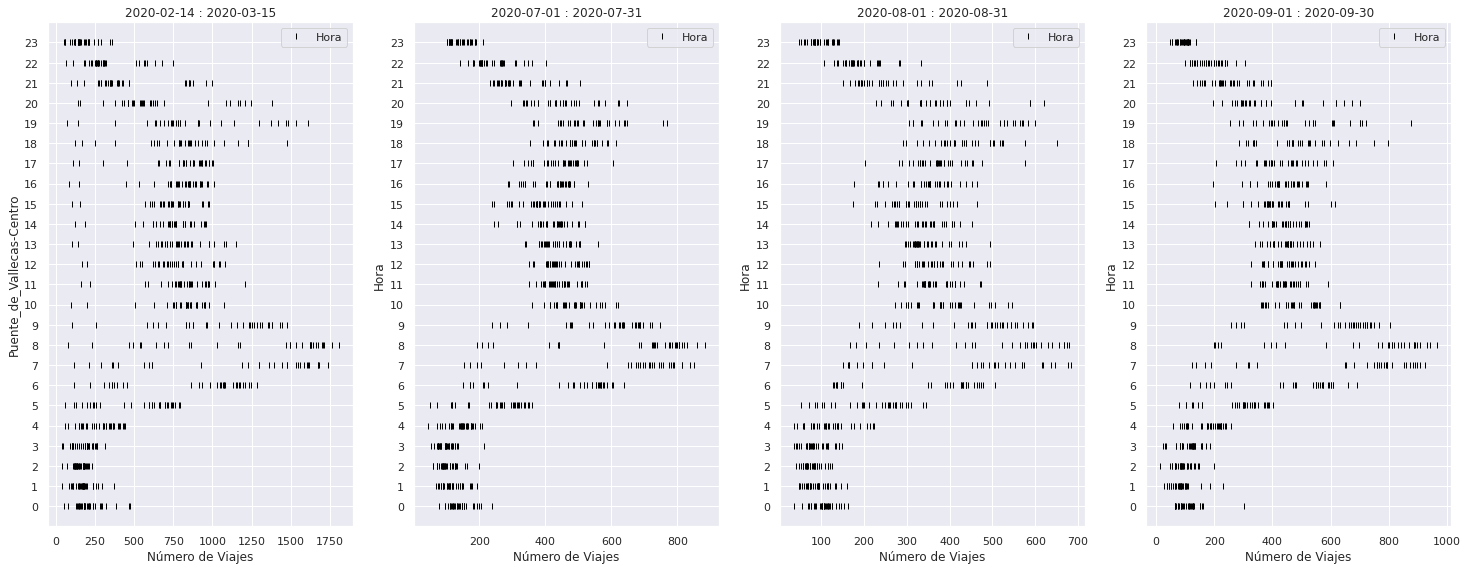

In [11]:
sb.set(rc = {'figure.figsize':(15,8)})
ax=0
Dict_periodos = {1:'2020-02-14 : 2020-03-15',2:'2020-07-01 : 2020-07-31', 3:'2020-08-01 : 2020-08-31', 4:'2020-09-01 : 2020-09-30'}
#Creamos dicionario para buscar el nombre de cada distrito
for line in listaDst:    
    if line=="ds":        
        fig, axes = plt.subplots(nrows=1, ncols=4)
        ax_list = fig.axes
        plt.subplots_adjust(left=0.001, bottom=None, right=1.3, top=1.0, wspace=0.2, hspace=0.5)
        continue
        
    origen = line.split("-",1)[0]
    destino = line.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}
    
for periodo in lista_periodos:    
    globals()[f"data{periodo}"] = globals()[f"df_{periodo}"].iloc[:,0:1]
    globals()[f"p{periodo}"] = globals()[f"data{periodo}"].plot(marker='|',linestyle='none',color='black',ax=ax_list[ax]); ax_list[ax].set_title(Dict_periodos[periodo])
    globals()[f"p{periodo}"].yaxis.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    if ax==0:        
        globals()[f"p{periodo}"].set_ylabel(lines_names[origen]+"-"+lines_names[destino])  
    else:
        globals()[f"p{periodo}"].set_ylabel("Hora")  
    globals()[f"p{periodo}"].set_xlabel("Número de Viajes")          
    globals()[f"p{periodo}"].set_ylim(-1, 24)       
    ax=ax+1    
    